In [1]:
import os

import kagglehub
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from pathlib import Path


In [2]:
#load last version of the dataset
path_to_kaggle_data = Path(kagglehub.dataset_download("alexattia/the-simpsons-characters-dataset"))
path_to_dataset = Path(os.path.join(path_to_kaggle_data, 'simpsons_dataset/simpsons_dataset'))
path_to_dataset

PosixPath('/home/ilya/.cache/kagglehub/datasets/alexattia/the-simpsons-characters-dataset/versions/4/simpsons_dataset/simpsons_dataset')

In [211]:
train_val_files = sorted(list(path_to_dataset.rglob('*.jpg')))


In [212]:
simpsons_count = dict()

In [213]:
def check_count_simpsons(path):
    for simpson in os.listdir(path):
        simpsons_count[simpson] = len(os.listdir(os.path.join(path, simpson)))

    plt.figure(figsize=(17, 10))
    plt.barh(simpsons_count.keys(), simpsons_count.values(), color='skyblue')
    plt.xlabel('Counts')
    plt.ylabel('Simpsons')
    plt.tight_layout()
    plt.show()

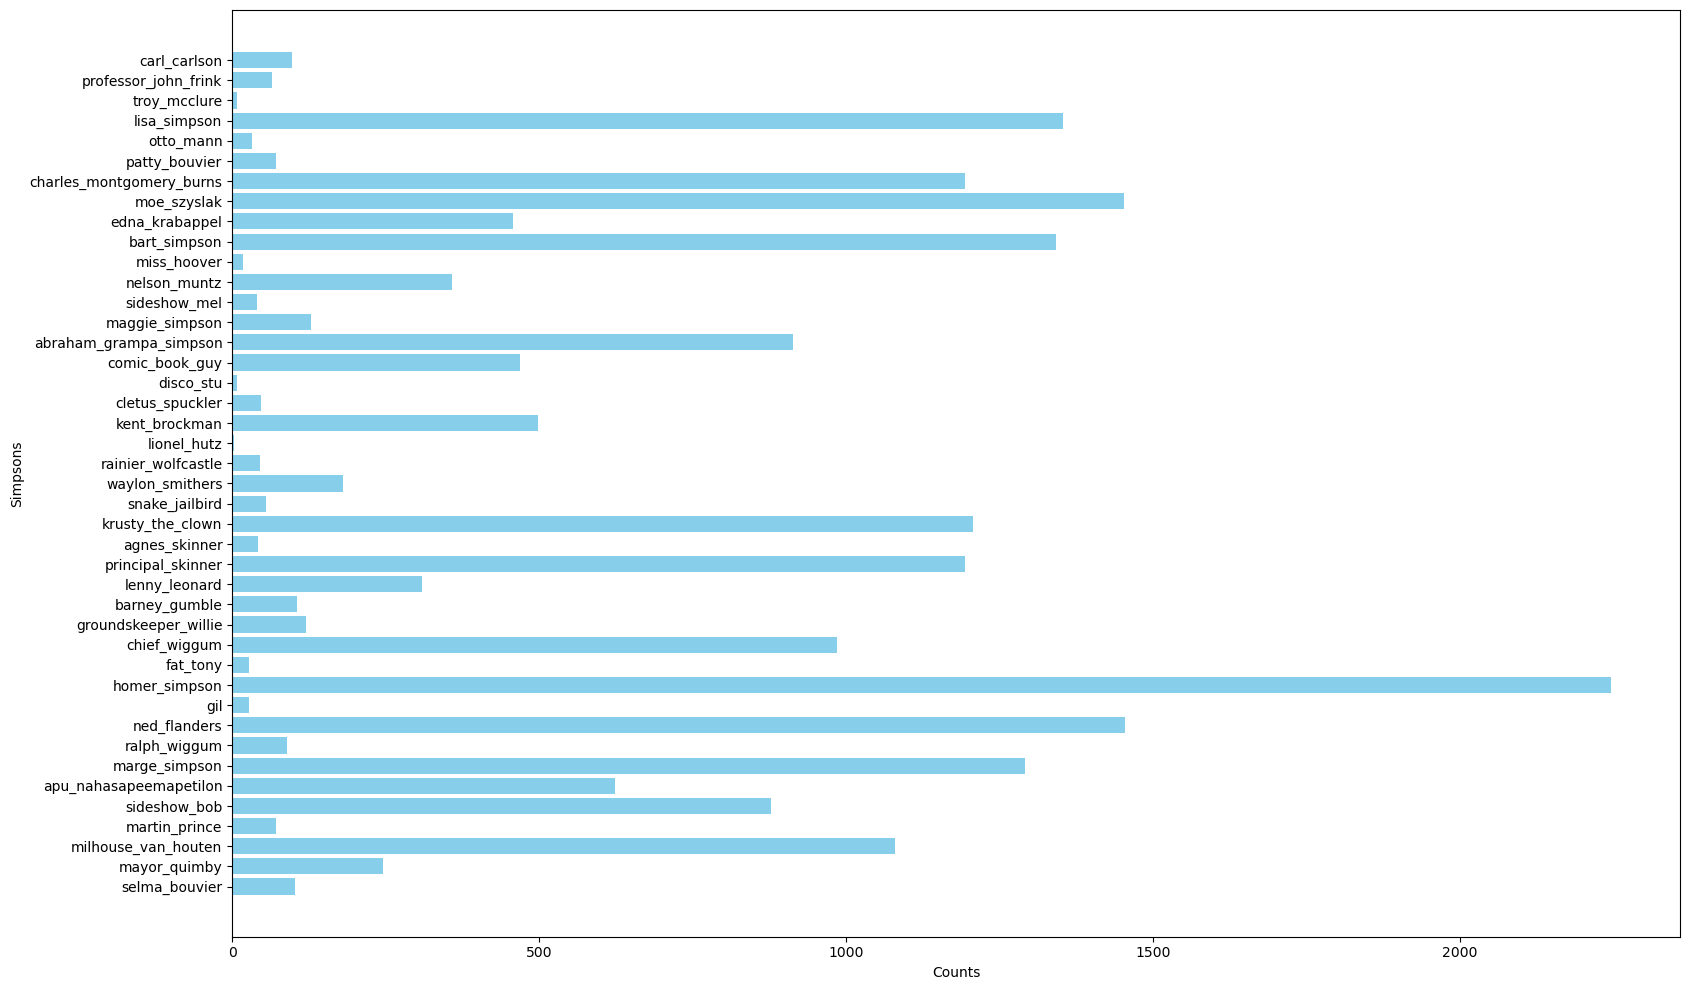

In [214]:
check_count_simpsons(path_to_dataset)

In [215]:
max_count = max(simpsons_count.values())
max_count

2246

In [216]:
def load_image(path):
    image = Image.open(path)
    image.load()

    return image, image.size

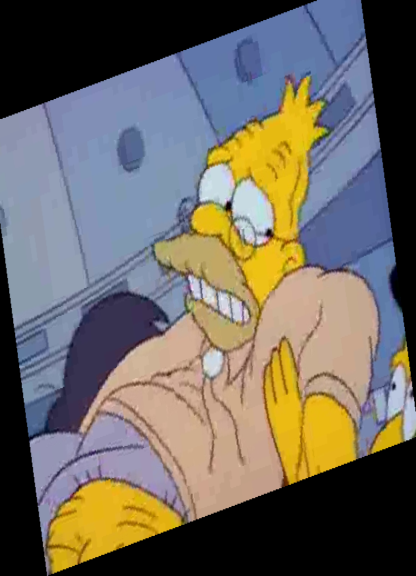

In [217]:
x, size = load_image('/home/ilya/.cache/kagglehub/datasets/alexattia/the-simpsons-characters-dataset/versions/4/simpsons_dataset/abraham_grampa_simpson/pic_0000.jpg')

transforms_train = transforms.Compose([
    transforms.RandomRotation(degrees=(-15, 15), expand=True),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=size, scale=(0.6, 1)),
])

x = transforms_train(x)
x

In [218]:
for simpson in os.listdir(path_to_dataset):

    path_to_simpson_dir = os.path.join(path_to_dataset, simpson)
    img_list = os.listdir(path_to_simpson_dir)
    count_img_for_cur_simps = simpsons_count[simpson]

    path_list_to_simpson_imgs = []

    for img in img_list:
        path_list_to_simpson_imgs.append(os.path.join(path_to_simpson_dir, img))

    print(simpson, count_img_for_cur_simps, len(list(range(max_count - count_img_for_cur_simps))))
    
    for i in range(max_count - count_img_for_cur_simps):
        path_to_img = path_list_to_simpson_imgs[i % count_img_for_cur_simps]
        
        img, _ = load_image(path_to_img)
        transform_img = transforms_train(img)
        transform_img.save(str(path_to_img)[:-4] + str(i + count_img_for_cur_simps) + ".jpg", "JPEG")


selma_bouvier 103 2143
mayor_quimby 246 2000
milhouse_van_houten 1079 1167
martin_prince 71 2175
sideshow_bob 877 1369
apu_nahasapeemapetilon 623 1623
marge_simpson 1291 955
ralph_wiggum 89 2157
ned_flanders 1454 792
gil 27 2219
homer_simpson 2246 0
fat_tony 27 2219
chief_wiggum 986 1260
groundskeeper_willie 121 2125
barney_gumble 106 2140
lenny_leonard 310 1936
principal_skinner 1194 1052
agnes_skinner 42 2204
krusty_the_clown 1206 1040
snake_jailbird 55 2191
waylon_smithers 181 2065
rainier_wolfcastle 45 2201
lionel_hutz 3 2243
kent_brockman 498 1748
cletus_spuckler 47 2199
disco_stu 8 2238
comic_book_guy 469 1777
abraham_grampa_simpson 913 1333
maggie_simpson 128 2118
sideshow_mel 40 2206
nelson_muntz 358 1888
miss_hoover 17 2229
bart_simpson 1342 904
edna_krabappel 457 1789
moe_szyslak 1452 794
charles_montgomery_burns 1193 1053
patty_bouvier 72 2174
otto_mann 32 2214
lisa_simpson 1354 892
troy_mcclure 8 2238
professor_john_frink 65 2181
carl_carlson 98 2148


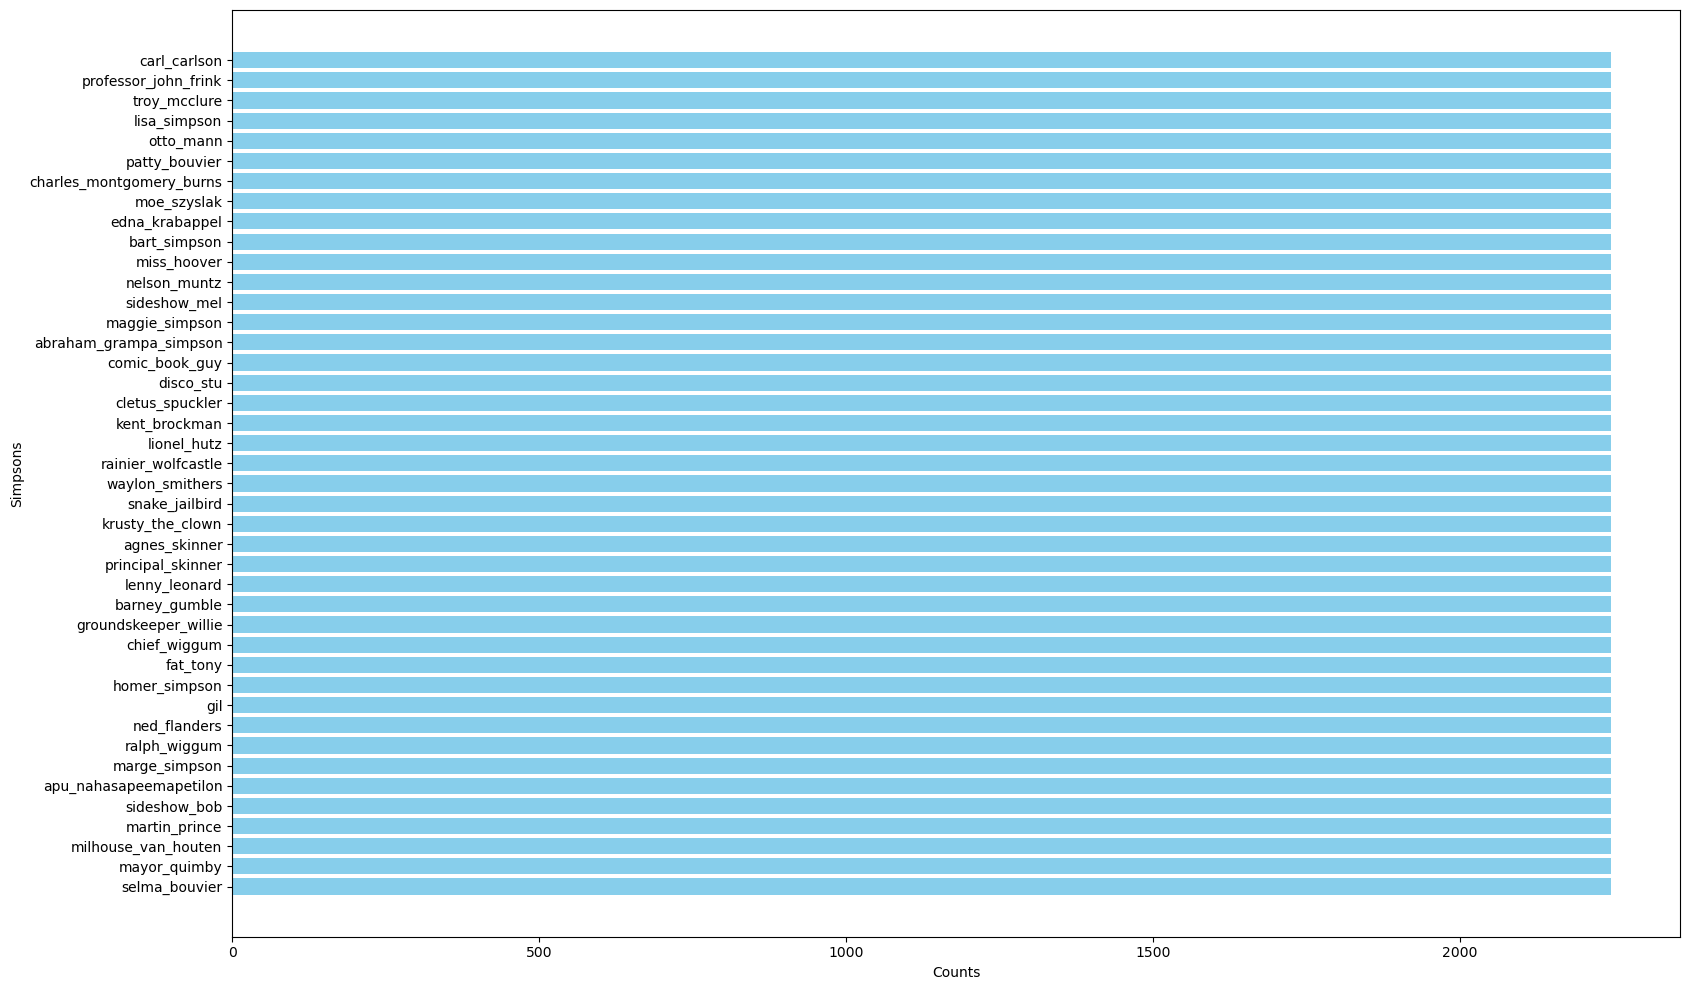

In [219]:
check_count_simpsons(path_to_dataset)